# Singular Value Decomposition (SVD)

**Разложение по сингулярным значениям** (SVD) — это рабочая лошадка в приложениях проекции наименьших квадратов, которая
составляют основу для многих статистических методов и методов машинного обучения.

После определения SVD мы опишем, как он подключается к

- **четыре фундаментальных пространства** линейной алгебры
- недоопределенные и переопределенные **регрессии наименьших квадратов**
- **Анализ главных компонентов** (PCA)


Как и анализ главных компонентов (PCA), DMD можно рассматривать как процедуру сокращения данных, которая представляет существенные закономерности путем проецирования данных на ограниченный набор факторов.

## Настройка

Пусть $X$ — матрица $m\times n$ ранга $p$.

Обязательно $p\leq\min(m,n)$.

На протяжении большей части этой лекции мы будем думать о $X$ как о матрице **данных**, в которой

- в каждом столбце указано **индивидуальное** – период времени или человек, в зависимости от приложения.
- каждая строка представляет собой **случайную величину**, описывающую атрибут периода времени или человека, в зависимости от приложения


Нас будут интересовать две ситуации

- **1** случай (short and fat) в котором $ m << n $, так что столбцов (отдельных лиц) намного больше, чем строк (атрибутов).
- **2** случай (tall and skinny), в котором $m >> n$, так что строк (атрибутов) гораздо больше, чем столбцов (отдельных лиц).


В обеих ситуациях мы применим **разложение по сингулярным значениям** $X$.

## Singular Value Decomposition


**Разложение по сингулярным значениям** $ m \times n $ матрицы $ X $ ранга $ p \leq \min(m,n) $ есть

$$
X  = U \Sigma V^\top
$$

где $U$ — ортогональная матрица левых сингулярных векторов, $V$ — ортогональная матрица правых сингулярных векторов, $\Sigma$ — диагональная матрица сингулярных значений.

## Четыре фундаментальных подпространства

Пусть $ {\mathcal C} $ обозначает пространство столбцов, $ {\mathcal N} $ обозначает нулевое пространство и $ {\mathcal R} $ обозначает пространство строк.

- **Пространство столбцов** $X$ — размерность $p$
- **Нулевое пространство** $X$ — размерность $n-p$
- **Пространство строк** $X$ — размерность $p$
- **Левое нулевое пространство** $X$ — размерность $m-p$

In [25]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

In [26]:
np.set_printoptions(precision=2)

# Define the matrix
A = np.array([[1, 2, 3, 4, 5],
              [2, 3, 4, 5, 6],
              [3, 4, 5, 6, 7],
              [4, 5, 6, 7, 8],
              [5, 6, 7, 8, 9]])

# Вычислите SVD матрицы c помощью np.linalg.svd
U, S, Vt = np.linalg.svd(A, full_matrices=True)

# Вычислить ранг матрицы linalg.matrix_rank
p = np.linalg.matrix_rank(A)

# Вывести все на печать
print("Матрица A:\n", A, '\n')
print(f"Ранг матрицы A: {p}\n")
print("SVD разложение:")
print("U:")
print(U)
print("\nS:", S)
print("V.T:")
print(Vt)

# Вычислите 4 фундаментальных пространства
row_space = U[:, :p]
col_space = Vt[:, :p]
null_space = Vt[:, p:]
left_null_space = U[:, p:]

# вывести все на печать
print("U:\n", U)
print("Column space:\n", col_space)
print("Left null space:\n", left_null_space)
print("V.T:\n", Vt)
print("Row space:\n", row_space)
print("Right null space:\n", null_space)

Матрица A:
 [[1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]
 [4 5 6 7 8]
 [5 6 7 8 9]] 

Ранг матрицы A: 2

SVD разложение:
U:
[[-0.27 -0.73 -0.47  0.06 -0.42]
 [-0.35 -0.42  0.1  -0.18  0.81]
 [-0.43 -0.11  0.75 -0.27 -0.4 ]
 [-0.51  0.19  0.06  0.83  0.05]
 [-0.59  0.5  -0.45 -0.45 -0.04]]

S: [2.69e+01 1.86e+00 7.83e-16 3.27e-16 4.69e-17]
V.T:
[[-0.27 -0.35 -0.43 -0.51 -0.59]
 [ 0.73  0.42  0.11 -0.19 -0.5 ]
 [ 0.02  0.06  0.29 -0.83  0.46]
 [ 0.52 -0.83  0.18  0.06  0.07]
 [-0.37 -0.08  0.82  0.04 -0.42]]
U:
 [[-0.27 -0.73 -0.47  0.06 -0.42]
 [-0.35 -0.42  0.1  -0.18  0.81]
 [-0.43 -0.11  0.75 -0.27 -0.4 ]
 [-0.51  0.19  0.06  0.83  0.05]
 [-0.59  0.5  -0.45 -0.45 -0.04]]
Column space:
 [[-0.27 -0.35]
 [ 0.73  0.42]
 [ 0.02  0.06]
 [ 0.52 -0.83]
 [-0.37 -0.08]]
Left null space:
 [[-0.47  0.06 -0.42]
 [ 0.1  -0.18  0.81]
 [ 0.75 -0.27 -0.4 ]
 [ 0.06  0.83  0.05]
 [-0.45 -0.45 -0.04]]
V.T:
 [[-0.27 -0.35 -0.43 -0.51 -0.59]
 [ 0.73  0.42  0.11 -0.19 -0.5 ]
 [ 0.02  0.06  0.29 -0.83  0.46]
 [ 0

## Теорема Эккарта-Янга

Наилучшее приближение ранга $r$ матрицы $X$:

$$
\hat X_r = \sigma_1 U_1 V_1^\top + \sigma_2 U_2 V_2^\top + \cdots + \sigma_r U_r V_r^\top
$$

## Полные и уменьшенные СВД

- in a **full** SVD: $U$ is $m \times m$, $\Sigma$ is $m \times n$, $V$ is $n \times n$
- in a **reduced** SVD: $U$ is $m \times p$, $\Sigma$ is $p \times p$, $V$ is $n \times p$

Сравним полное и уменьшенное SVD на примере **tall-skinny** случая ($m = 5 > n = 2$).

In [27]:
import numpy as np
X = np.random.rand(5,2)
U, S, V = np.linalg.svd(X, full_matrices=True)  # full SVD
Uhat, Shat, Vhat = np.linalg.svd(X, full_matrices=False) # economy SVD
print('U, S, V =')
U, S, V

U, S, V =


(array([[-0.23, -0.18, -0.82, -0.49,  0.02],
        [-0.44, -0.1 ,  0.35, -0.36, -0.74],
        [-0.53,  0.71,  0.13, -0.23,  0.39],
        [-0.59, -0.09, -0.26,  0.75, -0.12],
        [-0.35, -0.67,  0.34, -0.15,  0.54]]),
 array([1.32, 0.59]),
 array([[-0.7 , -0.71],
        [ 0.71, -0.7 ]]))

In [28]:
print('Uhat, Shat, Vhat = ')
Uhat, Shat, Vhat

Uhat, Shat, Vhat = 


(array([[-0.23, -0.18],
        [-0.44, -0.1 ],
        [-0.53,  0.71],
        [-0.59, -0.09],
        [-0.35, -0.67]]),
 array([1.32, 0.59]),
 array([[-0.7 , -0.71],
        [ 0.71, -0.7 ]]))

In [29]:
rr = np.linalg.matrix_rank(X)
print(f'rank of X = {rr}')

rank of X = 2


**Свойства:**

- Для полного SVD: $U^\top U = I$ и $U U^\top = I$
- Для уменьшенного SVD: $\hat U^\top \hat U = I$, но $\hat U \hat U^\top \neq I$

In [30]:
UTU = U.T @ U
UUT = U @ U.T
print('UUT, UTU = ')
UUT, UTU

UUT, UTU = 


(array([[ 1.00e+00,  1.47e-16,  1.22e-16, -3.21e-17,  2.05e-17],
        [ 1.47e-16,  1.00e+00,  7.34e-17,  4.28e-17,  1.32e-16],
        [ 1.22e-16,  7.34e-17,  1.00e+00,  8.32e-17, -6.62e-17],
        [-3.21e-17,  4.28e-17,  8.32e-17,  1.00e+00,  7.92e-17],
        [ 2.05e-17,  1.32e-16, -6.62e-17,  7.92e-17,  1.00e+00]]),
 array([[ 1.00e+00, -5.01e-17, -2.89e-18,  2.12e-16,  1.58e-17],
        [-5.01e-17,  1.00e+00, -9.03e-17,  1.86e-17, -1.19e-17],
        [-2.89e-18, -9.03e-17,  1.00e+00,  7.78e-17,  1.94e-18],
        [ 2.12e-16,  1.86e-17,  7.78e-17,  1.00e+00,  3.86e-17],
        [ 1.58e-17, -1.19e-17,  1.94e-18,  3.86e-17,  1.00e+00]]))

In [31]:
UhatUhatT = Uhat @ Uhat.T
UhatTUhat = Uhat.T @ Uhat
print('UhatUhatT, UhatTUhat= ')
UhatUhatT, UhatTUhat

UhatUhatT, UhatTUhat= 


(array([[ 0.09,  0.12, -0.01,  0.15,  0.2 ],
        [ 0.12,  0.2 ,  0.16,  0.27,  0.22],
        [-0.01,  0.16,  0.78,  0.25, -0.29],
        [ 0.15,  0.27,  0.25,  0.36,  0.27],
        [ 0.2 ,  0.22, -0.29,  0.27,  0.57]]),
 array([[ 1.00e+00, -5.01e-17],
        [-5.01e-17,  1.00e+00]]))

Теперь рассмотрим **short-fat** случай ($m = 2 < 5 = n$).

In [32]:
import numpy as np
X = np.random.rand(2,5)
U, S, V = np.linalg.svd(X, full_matrices=True)  # full SVD
Uhat, Shat, Vhat = np.linalg.svd(X, full_matrices=False) # economy SVD
print('U, S, V = ')
U, S, V

U, S, V = 


(array([[-0.89, -0.46],
        [-0.46,  0.89]]),
 array([1.78, 0.38]),
 array([[-0.16, -0.06, -0.65, -0.6 , -0.44],
        [ 0.51,  0.15,  0.46, -0.14, -0.7 ],
        [-0.7 , -0.27,  0.57, -0.31, -0.13],
        [-0.45,  0.35, -0.17,  0.63, -0.49],
        [-0.13,  0.88,  0.12, -0.36,  0.24]]))

In [33]:
print('Uhat, Shat, Vhat = ')
Uhat, Shat, Vhat

Uhat, Shat, Vhat = 


(array([[-0.89, -0.46],
        [-0.46,  0.89]]),
 array([1.78, 0.38]),
 array([[-0.16, -0.06, -0.65, -0.6 , -0.44],
        [ 0.51,  0.15,  0.46, -0.14, -0.7 ]]))

Проверим, что уменьшенное SVD точно представляет $X$:

In [34]:
SShat=np.diag(Shat)
np.allclose(X, Uhat@SShat@Vhat)

True

## Полярное разложение

$$
X  = SQ
$$

где $S = U\Sigma U^\top$ — симметричная матрица, $Q = U V^\top$ — ортогональная матрица.

## Приложение: анализ главных компонентов (PCA)

**Шаг 1.** Стандартизируйте данные (вычтите среднее).

**Шаг 2.** Вычислите ковариационную матрицу: $C = \frac{1}{n} BB^{\top}$

**Шаг 3.** Разложите ковариационную матрицу (SVD или собственное разложение).

**Шаг 4.** Выберите количество компонент по доле объясненной дисперсии.

**Шаг 5.** Создайте матрицу оценок: $T = U\Sigma$

## Класс DecomAnalysis

Объединяет PCA и SVD для заданной матрицы данных X.

In [35]:
class DecomAnalysis:
    """
    Класс для проведения PCA и SVD.
    X: data matrix
    r_component: chosen rank for best approximation
    """

    def __init__(self, X, r_component=None):
        self.X = X
        self.r_component = r_component or self.X.shape[0]
        self.rank = np.linalg.matrix_rank(self.X)

    def _get_positive_diag_matrix(self, matrix):
        return np.diag(np.sign(np.diag(matrix)))

    def pca(self):
        omega = self.X @ self.X.T

        self.eigenvalues, self.P = np.linalg.eig(omega)
        sorted_idxs = np.argsort(self.eigenvalues)[::-1]

        self.eigenvalues = self.eigenvalues[sorted_idxs]

        self.P = self.P[:, sorted_idxs]
        self.P = self.P @ self._get_positive_diag_matrix(self.P)

        self.eps = self.P.T @ self.X

        cut_P = self.P[:, :self.r_component]
        cut_eps = self.eps[:self.r_component, :]

        eps_rate = np.cumsum(self.eigenvalues) / np.sum(self.eigenvalues)

        X_pca = cut_P @ cut_eps

        return X_pca, eps_rate

    def svd(self):
        self.U, self.S, self.Vt = np.linalg.svd(self.X)
        sorted_idxs = np.argsort(self.S)[::-1]

        self.S = self.S[sorted_idxs]
        self.U = self.U[:, sorted_idxs]
        self.Vt = self.Vt[sorted_idxs, :]

        self.U = self.U @ self._get_positive_diag_matrix(self.U)
        self.Vt = self._get_positive_diag_matrix(self.Vt) @ self.Vt

        Sigma = np.zeros(self.X.shape)
        Sigma[:self.X.shape[0], :self.X.shape[0]] = np.diag(self.S)

        S2 = self.S**2

        eps_rate = np.cumsum(S2) / np.sum(S2)

        components_U = self.U[:, :self.r_component]
        components_Sigma = Sigma[:self.r_component, :self.r_component]
        components_Vt = self.Vt[:self.r_component, :]

        X_svd = components_U @ components_Sigma @ components_Vt

        return X_svd, eps_rate

    def fit(self, r_component):
        self.r_component = r_component

        # pca
        X_pca, eps_rate = self.pca()

        # svd
        X_svd, eps_rate = self.svd()

        return X_pca, X_svd


def diag_sign(A):
    "Compute the signs of the diagonal of matrix A"

    D = np.diag(np.sign(np.diag(A)))

    return D

In [36]:
X = np.random.rand(5, 10)
X

array([[0.5 , 0.03, 0.91, 0.26, 0.66, 0.31, 0.52, 0.55, 0.18, 0.97],
       [0.78, 0.94, 0.89, 0.6 , 0.92, 0.09, 0.2 , 0.05, 0.33, 0.39],
       [0.27, 0.83, 0.36, 0.28, 0.54, 0.14, 0.8 , 0.07, 0.99, 0.77],
       [0.2 , 0.01, 0.82, 0.71, 0.73, 0.77, 0.07, 0.36, 0.12, 0.86],
       [0.62, 0.33, 0.06, 0.31, 0.33, 0.73, 0.64, 0.89, 0.47, 0.12]])

In [37]:
da = DecomAnalysis(X)
X_pca, X_svd = da.fit(5)
print('X_pca:', X_pca)
print('X_svd:', X_svd)

X_pca: [[0.5  0.03 0.91 0.26 0.66 0.31 0.52 0.55 0.18 0.97]
 [0.78 0.94 0.89 0.6  0.92 0.09 0.2  0.05 0.33 0.39]
 [0.27 0.83 0.36 0.28 0.54 0.14 0.8  0.07 0.99 0.77]
 [0.2  0.01 0.82 0.71 0.73 0.77 0.07 0.36 0.12 0.86]
 [0.62 0.33 0.06 0.31 0.33 0.73 0.64 0.89 0.47 0.12]]
X_svd: [[ 0.76  0.18  0.92  0.39  0.74  0.39  0.35  0.64  0.02  0.61]
 [ 0.28  0.66  0.88  0.35  0.77 -0.05  0.51 -0.13  0.63  1.05]
 [ 0.74  1.09  0.37  0.51  0.68  0.27  0.51  0.24  0.7   0.15]
 [ 0.26  0.04  0.82  0.74  0.75  0.79  0.04  0.38  0.08  0.79]
 [ 0.29  0.14  0.05  0.15  0.23  0.63  0.85  0.77  0.67  0.56]]


Функция для сравнения PCA и SVD:

In [38]:
def compare_pca_svd(da):
    """
    Compare the outcomes of PCA and SVD.
    """

    da.pca()
    da.svd()

    print('Eigenvalues and Singular values\n')
    print(f'\u03bb = {da.eigenvalues}\n')
    print(f'\u03c3^2 = {da.S**2}\n')
    print('\n')

    # loading matrices
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    plt.suptitle('loadings')
    axs[0].plot(da.P.T)
    axs[0].set_title('P')
    axs[0].set_xlabel('m')
    axs[1].plot(da.U.T)
    axs[1].set_title('U')
    axs[1].set_xlabel('m')
    plt.show()

    # principal components
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    plt.suptitle('principal components')
    axs[0].plot(da.eps.T)
    axs[0].set_title('\u03b5')
    axs[0].set_xlabel('n')
    axs[1].plot(da.Vt[:da.rank, :].T * np.sqrt(da.eigenvalues))
    axs[1].set_title(r'$V^\top *\sqrt{\lambda}$')
    axs[1].set_xlabel('n')
    plt.show()

Eigenvalues and Singular values

λ = [12.32  1.67  1.38  0.72  0.31]

σ^2 = [12.32  1.67  1.38  0.72  0.31]





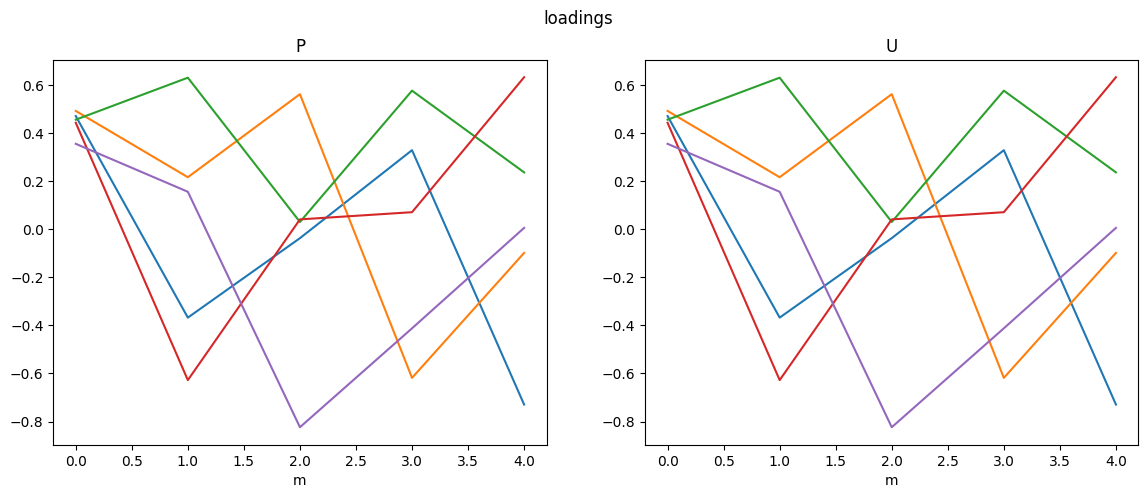

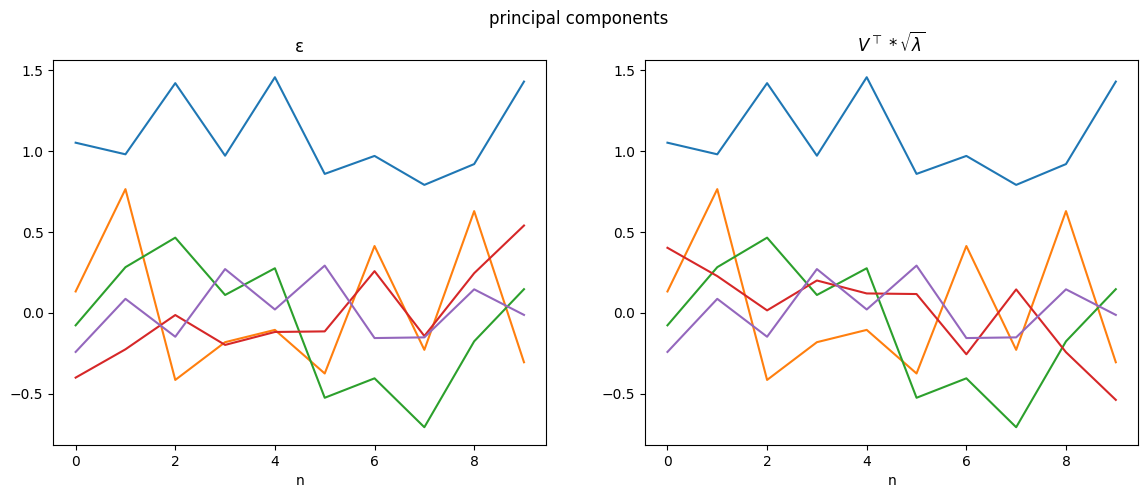

In [39]:
compare_pca_svd(da)

## Упражнение

В методе обычных наименьших квадратов (OLS) мы учимся вычислять $ \hat{\beta} = (X^\top X)^{-1} X^\top y $, но бывают случаи, например, когда у нас есть коллинеарность или недоопределенная система: **короткая толстая** матрица.

В этих случаях матрица $(X^\top X)$ не является необратимой (ее определитель равен нулю) или плохо обусловленной (ее определитель очень близок к нулю).

Вместо этого мы можем создать так называемую [псевдообратную](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse), аппроксимацию инвертированной матрицы полного ранга, чтобы мы могли вычислить с ее помощью $ \hat{\beta} $.

Думая в терминах теоремы Эккарта-Янга, постройте псевдообратную матрицу $ X^{+} $ и используйте ее для вычисления $ \hat{\beta} $.